# Análisis exploratorio de datos - **Comentarios Youtube**

# 1. Importar librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Descargar recursos de NLTK si es necesario
try:
    stopwords.words('english')
except:
    nltk.download('stopwords')
    nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 2 . CARGA E INSPECCIÓN INICIAL DE DATOS

In [ ]:
df = pd.read_csv('/content/youtoxic_english_1000.csv')

print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)
print(f"Dimensiones: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\n📋 Columnas disponibles:")
print(df.columns.tolist())

📊 INFORMACIÓN BÁSICA DEL DATASET
Dimensiones: (1000, 15)
Número de filas: 1000
Número de columnas: 15

📋 Columnas disponibles:
['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']


#  3. ESTRUCTURA Y CALIDAD DE DATOS

In [ ]:
print("🔍 INFORMACIÓN DETALLADA")
print("="*30)
print(df.info())
print("\n🎯 PRIMERAS 5 FILAS:")
df.head()

🔍 INFORMACIÓN DETALLADA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB
None

🎯 PRIMERAS 5 FILAS:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe(include="all")

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgjBJKQSoQMQ6ngCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


# 4. EDA

In [ ]:
import pandas as pd

# Obtener los VideoId únicos
video_ids_unicos = df['VideoId'].unique()

# Imprimirlos
for video_id in video_ids_unicos:
    print(video_id)


04kJtp6pVXI
4rCweDxDqdw
5vF4si3hoRA
8HB18hZrhXc
9pr1oE34bIM
bUgKZMSxr3E
cT14IbTDW2c
dDbRyFIkNII
dG7mZQvaQDk
Dt9-byUhPdg
#NAME?
TZxEyoplYbI
XRuCW80L9mA


In [ ]:
import pandas as pd
import plotly.express as px


# 2. Contar ocurrencias de cada VideoId
conteo_videos = df['VideoId'].value_counts().reset_index()
conteo_videos.columns = ['VideoId', 'Cantidad']

# 3. Calcular el porcentaje
conteo_videos['Porcentaje'] = conteo_videos['Cantidad'] / conteo_videos['Cantidad'].sum() * 100

# 4. Crear treemap interactivo
fig = px.treemap(
    conteo_videos,
    path=['VideoId'],
    values='Cantidad',
    hover_data={'Cantidad': True, 'Porcentaje': ':.2f'},
    title='Distribución de comentarios por VideoId'
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()



A la hora de obtener mas información de los datos usados en nuestro dataframe, usaremos los videoId a la hora de rastrear los videos obteniendo con ello los títulos de los mismos.

In [ ]:
import pandas as pd


# Diccionario de títulos
titulos = {
    "04kJtp6pVXI": "CNN interview gets testy over Ferguson protests",
    "4rCweDxDqdw": "No disponible1",
    "5vF4si3hoRA": "Riots, bullets, tear gas in Ferguson",
    "8HB18hZrhXc": "USA: Watch police point their weapons at protesters in Ferguson",
    "9pr1oE34bIM": "The Truth About Michael Brown and the Ferguson Riots",
    "bUgKZMSxr3E": "Joe Rogan Talks Mike Brown Shooting in Ferguson",
    "cT14IbTDW2c": "Ferguson protesters block I‑5 in La Jolla",
    "dDbRyFIkNII": "Police Tear Gas Protesters in Ferguson (vía archivo)",
    "dG7mZQvaQDk": "Peggy Hubbard talks about Ferguson and Protests",
    "Dt9-byUhPdg": "A Raw Scene as Ferguson Turns Violent | The New York Times",
    "#NAME?": "No disponible",
    "TZxEyoplYbI": "A City Reacts: State of Emergency - Ferguson, Missouri (Dispatch 10)",
    "XRuCW80L9mA": "The roots of unrest in Ferguson"
}

# Crear la nueva columna 'Title'
df['Title'] = df['VideoId'].map(titulos)

# Verifica el resultado
print(df[['VideoId', 'Title']].drop_duplicates())

# (Opcional) Guardar en un nuevo CSV
# df.to_csv('comentarios_con_titulos.csv', index=False)


         VideoId                                              Title
0    04kJtp6pVXI    CNN interview gets testy over Ferguson protests
172  4rCweDxDqdw                                     No disponible1
209  5vF4si3hoRA               Riots, bullets, tear gas in Ferguson
217  8HB18hZrhXc  USA: Watch police point their weapons at prote...
255  9pr1oE34bIM  The Truth About Michael Brown and the Ferguson...
529  bUgKZMSxr3E    Joe Rogan Talks Mike Brown Shooting in Ferguson
568  cT14IbTDW2c          Ferguson protesters block I‑5 in La Jolla
714  dDbRyFIkNII  Police Tear Gas Protesters in Ferguson (vía ar...
724  dG7mZQvaQDk    Peggy Hubbard talks about Ferguson and Protests
836  Dt9-byUhPdg  A Raw Scene as Ferguson Turns Violent | The Ne...
870       #NAME?                                      No disponible
886  TZxEyoplYbI  A City Reacts: State of Emergency - Ferguson, ...
990  XRuCW80L9mA                    The roots of unrest in Ferguson


In [ ]:
import plotly.express as px

conteo_videos = df['Title'].value_counts().reset_index()
conteo_videos.columns = ['Title', 'Cantidad']
conteo_videos['Porcentaje'] = conteo_videos['Cantidad'] / conteo_videos['Cantidad'].sum() * 100

fig = px.treemap(
    conteo_videos,
    path=['Title'],
    values='Cantidad',
    hover_data={'Cantidad': True, 'Porcentaje': ':.2f'},
    title='Distribución de comentarios por título de video'
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


### Worcloud de palabras mas repetidas

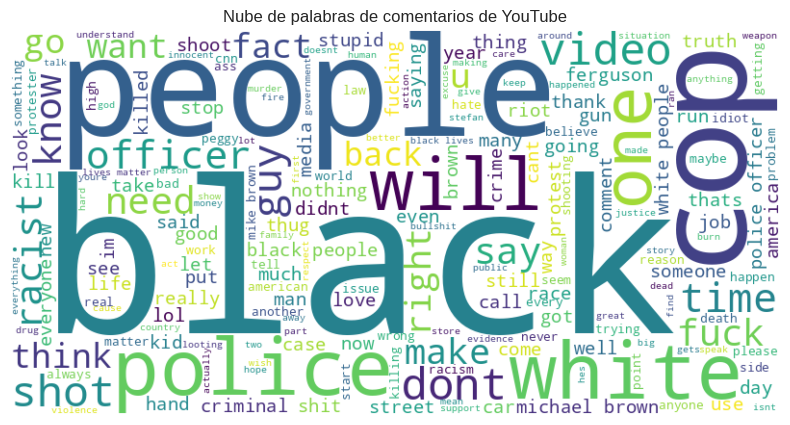

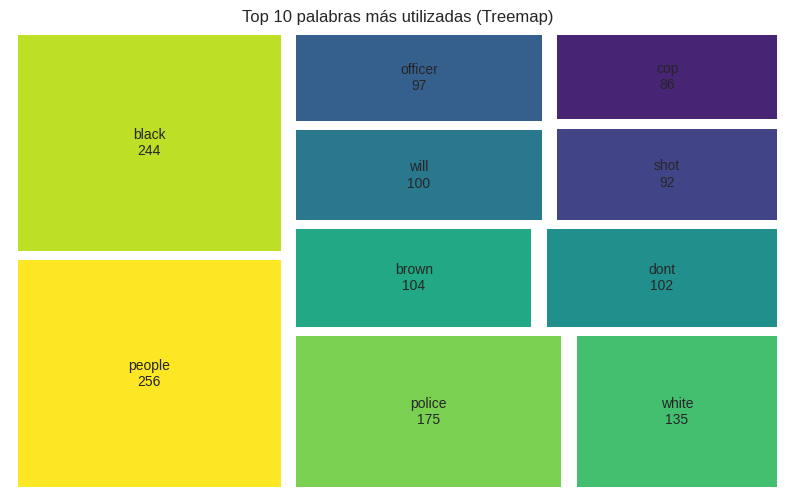

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string
!pip install squarify
import squarify
from collections import Counter


# 2. Unir todos los comentarios en un solo texto
texto = " ".join(str(comentario) for comentario in df['Text'])

# 3. Limpieza básica
texto = texto.lower()
texto = texto.translate(str.maketrans('', '', string.punctuation))

# 4. Eliminar palabras vacías
stopwords = set(STOPWORDS)
palabras = [word for word in texto.split() if word not in stopwords]

# 5. Contar palabras
contador = Counter(palabras)
top_10 = contador.most_common(10)

# ---------- NUBE DE PALABRAS ----------
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(" ".join(palabras))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de comentarios de YouTube')
plt.show()

# ---------- TREEMAP ----------
# Preparar datos
labels = [f"{palabra}\n{conteo}" for palabra, conteo in top_10]
sizes = [conteo for _, conteo in top_10]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=plt.cm.viridis_r([i/10 for i in range(10)]), pad=True)
plt.axis('off')
plt.title("Top 10 palabras más utilizadas (Treemap)")
plt.show()



### Distribución de las variables objetivo

In [ ]:
import plotly.express as px

toxicity_columns = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
    'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
    'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]

# Calcular conteo de cada tipo de toxicidad
toxicity_counts = df[toxicity_columns].sum().sort_values(ascending=False)

# Calcular comentarios que no tienen ningún tipo de toxicidad
no_toxic_count = (df[toxicity_columns].sum(axis=1) == 0).sum()

# Añadir al conteo
toxicity_counts['NoToxic'] = no_toxic_count

# Convertir a DataFrame para Plotly
toxicity_df = toxicity_counts.reset_index()
toxicity_df.columns = ['Tipo', 'Cantidad']

# Crear gráfico interactivo
fig = px.bar(
    toxicity_df,
    x='Tipo',
    y='Cantidad',
    text='Cantidad',
    title='Distribución de Tipos de Toxicidad (interactivo)',
    labels={'Cantidad': 'Número de Comentarios', 'Tipo': 'Tipo de Toxicidad'},
    color='Tipo',
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    showlegend=False,
    margin=dict(t=60, l=30, r=30, b=90)
)

fig.show()


# 5. ANÁLISIS DE VALORES FALTANTES

### 5.1 VALORES FALTANTES

In [ ]:
print("❌ VALORES FALTANTES")
print("="*25)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percentage.values
})
print(missing_df[missing_df['Valores Faltantes'] > 0])

# Visualización de valores faltantes
if missing_data.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Mapa de Valores Faltantes')
    plt.show()

❌ VALORES FALTANTES
Empty DataFrame
Columns: [Columna, Valores Faltantes, Porcentaje]
Index: []


# 6. LIMPIEZA Y PREPROCESAMIENTO DE TEXTO

### 6.1 Análisis del texto

In [ ]:
import string
!pip install emoji
import emoji

print("🧹 ANÁLISIS Y LIMPIEZA DEL TEXTO")
print("="*35)

# Función de limpieza completa
def analyze_text_characteristics(texts):
    """Analiza características del texto antes de limpieza"""
    stats = {
        'urls': sum(1 for text in texts if 'http' in str(text) or 'www.' in str(text)),
        'mentions': sum(1 for text in texts if '@' in str(text)),
        'hashtags': sum(1 for text in texts if '#' in str(text)),
        'emojis': sum(1 for text in texts if emoji.demojize(str(text)) != str(text)),
        'numbers': sum(1 for text in texts if any(char.isdigit() for char in str(text))),
        'special_chars': sum(1 for text in texts if any(char in string.punctuation for char in str(text))),
        'all_caps_words': sum(len([word for word in str(text).split() if word.isupper() and len(word) > 1]) for text in texts)
    }
    return stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.1 MB/s eta 0:00:00
🧹 ANÁLISIS Y LIMPIEZA DEL TEXTO


Este bloque de código define una función llamada analyze_text_characteristics que analiza el contenido textual de una columna (por ejemplo df['Text']) y cuenta cuántos comentarios tienen ciertos elementos problemáticos o interesantes antes de limpiarlos.

La función toma una lista o columna de textos (texts) y devuelve un diccionario (stats) con los siguientes análisis:

| Clave del diccionario | ¿Qué mide?                           | Ejemplo           | ¿Cómo lo calcula?                                                 |
| --------------------- | ------------------------------------ | ----------------- | ----------------------------------------------------------------- |
| `'urls'`              | Comentarios que contienen URLs       | `http://`, `www.` | Busca si `'http'` o `'www.'` están en el texto                    |
| `'mentions'`          | Comentarios con menciones            | `@user123`        | Busca `@`                                                         |
| `'hashtags'`          | Comentarios con hashtags             | `#topic`          | Busca `#`                                                         |
| `'emojis'`            | Comentarios con emojis               | 😊 💥             | Usa `emoji.demojize()` para ver si hay emojis                     |
| `'numbers'`           | Comentarios con números              | `lol123`          | Busca si hay caracteres numéricos (`isdigit()`)                   |
| `'special_chars'`     | Comentarios con signos de puntuación | `?!@#`            | Verifica si hay caracteres en `string.punctuation`                |
| `'all_caps_words'`    | Palabras en mayúsculas completas     | `THIS IS BAD`     | Cuenta palabras que estén en mayúsculas y tengan más de una letra |


In [ ]:
# Analizar características del texto crudo
print("📊 CARACTERÍSTICAS DEL TEXTO CRUDO:")
text_chars = analyze_text_characteristics(df['Text'])
for key, value in text_chars.items():
    percentage = (value / len(df)) * 100
    print(f"  {key}: {value} comentarios ({percentage:.1f}%)")

# Ejemplos de texto problemático
print("\n🔍 EJEMPLOS DE TEXTO PROBLEMÁTICO:")
print("URLs:")
url_examples = df[df['Text'].str.contains('http|www\.', na=False)]['Text'].head(2)
for i, text in enumerate(url_examples, 1):
    print(f"  {i}. {text[:100]}...")

print("\nEmojis/Símbolos especiales:")
special_examples = df[df['Text'].str.contains('[^\w\s]', regex=True, na=False)]['Text'].head(2)
for i, text in enumerate(special_examples, 1):
    print(f"  {i}. {text[:100]}...")


📊 CARACTERÍSTICAS DEL TEXTO CRUDO:
  urls: 12 comentarios (1.2%)
  mentions: 6 comentarios (0.6%)
  hashtags: 10 comentarios (1.0%)
  emojis: 8 comentarios (0.8%)
  numbers: 146 comentarios (14.6%)
  special_chars: 862 comentarios (86.2%)
  all_caps_words: 794 comentarios (79.4%)

🔍 EJEMPLOS DE TEXTO PROBLEMÁTICO:
URLs:
  1. here people his facebook is https://www.facebook.com/bassem.masri.520 he has ties with isis and othe...
  2. I made a song addressing Ferguson and the issues today. Please listen and thank you

Tha Bigger Pict...

Emojis/Símbolos especiales:
  1. If only people would just take a step back and not make this case about them, because it wasn't abou...
  2. Law enforcement is not trained to shoot to apprehend.  They are trained to shoot to kill.  And I tha...


📊 Análisis de resultados

Estos números muestran qué tanto “ruido” o elementos no textuales tiene el dataset crudo:

| Característica   | Total (de 1000) | ¿Qué significa?                                                                                                            |
| ---------------- | --------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `urls`           | 12 (1.2%)       | Muy pocos comentarios con enlaces web. Se pueden eliminar sin perder mucha información.                                    |
| `mentions`       | 6 (0.6%)        | Muy pocos `@usuario`, se pueden limpiar fácilmente.                                                                        |
| `hashtags`       | 10 (1.0%)       | También bajo impacto, pero se puede conservar el texto del hashtag si es útil.                                               |
| `emojis`         | 8 (0.8%)        | Casi insignificantes. Podrían eliminarse o traducirse a texto si nos interesa el tono emocional.                           |
| `numbers`        | 146 (14.6%)     | Bastante frecuentes. ¿Son importantes? Si no son útiles, se pueden eliminar.                                               |
| `special_chars`  | 862 (86.2%)     | Muy común. La mayoría de los comentarios contiene puntuación, emojis u otros símbolos.                                     |
| `all_caps_words` | 794 (79.4%)     | Muchísimas palabras en mayúsculas completas → Podría indicar tono agresivo o enfático (*¡útil para modelos de toxicidad!*) |


### 6.2 Limpieza del texto

In [ ]:
import re
!pip install emoji
import emoji
import pandas as pd

def clean_text_v2(text):
    """Limpieza avanzada basada en análisis de características"""
    if pd.isna(text):
        return ""

    text = str(text)

    # 1. Convertir emojis a texto para conservar la carga emocional
    text = emoji.demojize(text, delimiters=(" ", " "))

    # 2. Convertir todo a minúsculas para normalizar y reducir dimensionalidad
    text = text.lower()

    # 3. Eliminar URLs (1.2% solo, no aportan mucho, mejor limpiar)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 4. Eliminar menciones @usuario (muy poco frecuentes, ruido)
    text = re.sub(r'@\w+', '', text)

    # 5. Conservar texto de hashtags, eliminando solo el símbolo #
    text = re.sub(r'#', '', text)

    # 6. Mantener números, pueden ser relevantes

    # 7. Eliminar caracteres especiales excepto puntuación básica y números
    text = re.sub(r'[^\w\s.!?\d]', '', text)

    # 8. Eliminar múltiples espacios y limpiar espacios inicio/fin
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def count_uppercase_ratio(text):
    """Calcula la proporción de palabras en mayúsculas en un texto"""
    if pd.isna(text):
        return 0
    words = str(text).split()
    if not words:
        return 0
    upper_words = sum(1 for w in words if w.isupper() and len(w) > 1)
    return upper_words / len(words)


df['Text_Clean'] = df['Text'].apply(clean_text_v2)
df['Uppercase_Ratio'] = df['Text'].apply(count_uppercase_ratio)


In [ ]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Title,Text_Clean,Uppercase_Ratio
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,if only people would just take a step back and...,0.003484
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,law enforcement is not trained to shoot to app...,0.000000
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,dont you reckon them black lives matter banner...,0.000000
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,there are a very large number of people who do...,0.000000
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,the arab dude is absolutely right he should ha...,0.000000


## Paso: Limpieza avanzada y extracción de características de mayúsculas

### Objetivo
Preparar el texto para el modelo de clasificación, limpiándolo de ruido innecesario pero conservando información relevante para detectar toxicidad y matices emocionales.

### Qué hicimos

1. **Conversión de emojis a texto:**  
   Transformamos los emojis en su representación textual (por ejemplo, 😀 → `:grinning_face:`) para que el modelo pueda captar la carga emocional que transmiten, ya que aunque aparecen en pocos comentarios, pueden aportar contexto importante.

2. **Normalización a minúsculas:**  
   Convertimos todo el texto a minúsculas para evitar que palabras iguales en diferente forma (como "MALO" y "malo") sean tratadas como diferentes, reduciendo la dimensionalidad y mejorando la coherencia del modelo.

3. **Eliminación de URLs y menciones:**  
   Removimos enlaces web y menciones de usuarios (@usuario), ya que aparecen muy pocas veces y suelen aportar poco valor para la clasificación.

4. **Conservación del texto de hashtags:**  
   Eliminamos solo el símbolo `#`, manteniendo la palabra del hashtag para que el modelo pueda aprovechar esos términos como temas o palabras clave.

5. **Mantenimiento de números y puntuación básica:**  
   Conservamos los números, pues aparecen en un porcentaje relevante y pueden ser informativos. También mantuvimos la puntuación básica (`. ! ?`) para preservar estructura y tono.

6. **Eliminación de otros caracteres especiales:**  
   Se eliminaron símbolos y caracteres no alfanuméricos ni de puntuación básica para reducir ruido y facilitar la tokenización.

7. **Limpieza de espacios:**  
   Eliminamos espacios extras y espacios en los extremos para dejar un texto limpio y bien formateado.

---

### Característica adicional: Proporción de palabras en mayúsculas

- Calculamos un nuevo feature que indica el porcentaje de palabras completamente en mayúsculas en cada comentario.  
- Esta proporción puede reflejar énfasis, gritos o tono agresivo, información valiosa para detectar toxicidad.  
- Esta métrica se calcula antes de la limpieza (sobre el texto original) y se añade como una columna extra en el DataFrame.

---

Esta limpieza balancea la eliminación de ruido con la conservación de señales importantes para el modelo, como emojis, números, hashtags y el uso de mayúsculas.


In [ ]:
def has_uppercase_word(text):
    if pd.isna(text):
        return False
    words = str(text).split()
    return any(w.isupper() and len(w) > 1 for w in words)

df['Has_Uppercase_Word'] = df['Text'].apply(has_uppercase_word)


### Característica adicional: Crear una columna booleana que indique si un comentario tiene mínimo una palabra con todas las letras en mayusculas.



### 6.3 Análisis visual del texto antes y después de la limpieza

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 1. Histograma de longitud de texto antes y después
fig1 = go.Figure()
fig1.add_trace(go.Histogram(
    x=df['Text'].str.len(),
    nbinsx=50,
    name='Original',
    opacity=0.6,
    marker_color='blue'
))
fig1.add_trace(go.Histogram(
    x=df['Text_Clean'].str.len(),
    nbinsx=50,
    name='Limpio',
    opacity=0.6,
    marker_color='green'
))
fig1.update_layout(
    title='Distribución de longitud del texto antes y después de limpieza',
    xaxis_title='Longitud del texto (caracteres)',
    yaxis_title='Número de comentarios',
    barmode='overlay'
)

# 2. Histograma de proporción de palabras en mayúsculas
fig2 = go.Figure()
fig2.add_trace(go.Histogram(
    x=df['Uppercase_Ratio'],
    nbinsx=30,
    marker_color='orange'
))
fig2.update_layout(
    title='Distribución de la proporción de palabras en mayúsculas',
    xaxis_title='Proporción de palabras en mayúsculas',
    yaxis_title='Número de comentarios'
)

# Mostrar ambos gráficos
fig1.show()
fig2.show()


In [ ]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Title,Text_Clean,Uppercase_Ratio,Has_Uppercase_Word
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,if only people would just take a step back and...,0.003484,True
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,law enforcement is not trained to shoot to app...,0.000000,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,dont you reckon them black lives matter banner...,0.000000,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,there are a very large number of people who do...,0.000000,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,CNN interview gets testy over Ferguson protests,the arab dude is absolutely right he should ha...,0.000000,False


Longitud del texto (caracteres y palabras)

In [ ]:
# Longitud en caracteres
df['Text_Length'] = df['Text_Clean'].str.len()

# Número de palabras
df['Word_Count'] = df['Text_Clean'].str.split().str.len()


Cantidad de signos de exclamación e interrogación

In [ ]:
# Contar '!' y '?'
df['Exclamation_Count'] = df['Text'].str.count('!')
df['Question_Count'] = df['Text'].str.count('\?')  # se escapa con '\?' porque '?' es un carácter especial en regex


 Presencia de caracteres repetidos (como "Noooo", "Whattt??")

In [ ]:
import re

def has_repeated_characters(text):
    if pd.isna(text):
        return False
    # Busca letras repetidas 3 o más veces, o signos repetidos como "!!!"
    return bool(re.search(r'(.)\1{2,}', str(text)))

df['Repeated_Chars'] = df['Text'].apply(has_repeated_characters)


In [ ]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,...,IsRadicalism,Title,Text_Clean,Uppercase_Ratio,Has_Uppercase_Word,Text_Length,Word_Count,Exclamation_Count,Question_Count,Repeated_Chars
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,...,False,CNN interview gets testy over Ferguson protests,if only people would just take a step back and...,0.003484,True,1533,286,0,1,True
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,...,False,CNN interview gets testy over Ferguson protests,law enforcement is not trained to shoot to app...,0.000000,False,136,25,0,0,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,...,False,CNN interview gets testy over Ferguson protests,dont you reckon them black lives matter banner...,0.000000,False,414,77,0,0,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,...,False,CNN interview gets testy over Ferguson protests,there are a very large number of people who do...,0.000000,False,579,107,0,0,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,...,False,CNN interview gets testy over Ferguson protests,the arab dude is absolutely right he should ha...,0.000000,False,239,47,0,1,False


# 7. Preparación de datos para el modelo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CommentId           1000 non-null   object 
 1   VideoId             1000 non-null   object 
 2   Text                1000 non-null   object 
 3   IsToxic             1000 non-null   bool   
 4   IsAbusive           1000 non-null   bool   
 5   IsThreat            1000 non-null   bool   
 6   IsProvocative       1000 non-null   bool   
 7   IsObscene           1000 non-null   bool   
 8   IsHatespeech        1000 non-null   bool   
 9   IsRacist            1000 non-null   bool   
 10  IsNationalist       1000 non-null   bool   
 11  IsSexist            1000 non-null   bool   
 12  IsHomophobic        1000 non-null   bool   
 13  IsReligiousHate     1000 non-null   bool   
 14  IsRadicalism        1000 non-null   bool   
 15  Title               1000 non-null   object 
 16  Text_Cl

# En este momento nuestro modelo intentará predecir si el comentario es toxic o no por lo que la variable que predeciremos será IsToxic

Antes de nada vamos a guardar nuestro df ya limpio

In [ ]:
df.to_csv("youtoxic_enriched_full.csv", index=False)
print("📁 Archivo guardado como 'youtoxic_enriched_full.csv'")

📁 Archivo guardado como 'youtoxic_enriched_full.csv'


In [ ]:
# Columnas que vamos a mantener para modelar
cols_to_keep = [
    'Text_Clean',
    'Uppercase_Ratio',
    'Has_Uppercase_Word',
    'Text_Length',
    'Word_Count',
    'Exclamation_Count',
    'Question_Count',
    "Repeated_Chars",
    'IsToxic'
]

# Eliminar todas las columnas que no están en cols_to_keep
df_model = df[cols_to_keep].copy()

# Confirmar las columnas del nuevo DataFrame
print("Columnas en df_model:")
print(df_model.columns)

# Ver primeras filas para comprobar
df_model.head()


Columnas en df_model:
Index(['Text_Clean', 'Uppercase_Ratio', 'Has_Uppercase_Word', 'Text_Length',
       'Word_Count', 'Exclamation_Count', 'Question_Count', 'Repeated_Chars',
       'IsToxic'],
      dtype='object')


,Text_Clean,Uppercase_Ratio,Has_Uppercase_Word,Text_Length,Word_Count,Exclamation_Count,Question_Count,Repeated_Chars,IsToxic
0,if only people would just take a step back and...,0.003484,True,1533,286,0,1,True,False
1,law enforcement is not trained to shoot to app...,0.000000,False,136,25,0,0,False,True
2,dont you reckon them black lives matter banner...,0.000000,False,414,77,0,0,True,True
3,there are a very large number of people who do...,0.000000,False,579,107,0,0,False,False
4,the arab dude is absolutely right he should ha...,0.000000,False,239,47,0,1,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Separar features y target
X_text = df_model['Text_Clean']
X_numeric = df_model[['Uppercase_Ratio', 'Has_Uppercase_Word', 'Text_Length', 'Word_Count', 'Exclamation_Count', 'Question_Count',"Repeated_Chars"]]
y = df_model['IsToxic']

# Dividir en train y test
X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorizador TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_test_tfidf = tfidf.transform(X_text_test)

# Convertir numéricos a float para hstack
X_num_train = X_num_train.astype(float)
X_num_test = X_num_test.astype(float)

# Combinar sparse matrix con variables numéricas (convertidas a sparse)
X_train = hstack([X_text_train_tfidf, X_num_train])
X_test = hstack([X_text_test_tfidf, X_num_test])

print(f"Dimensiones X_train: {X_train.shape}")
print(f"Dimensiones X_test: {X_test.shape}")
print(f"Dimensiones y_train: {y_train.shape}")
print(f"Dimensiones y_test: {y_test.shape}")



Dimensiones X_train: (800, 5007)
Dimensiones X_test: (200, 5007)
Dimensiones y_train: (800,)
Dimensiones y_test: (200,)


Dimensiones X_train: (800, 5007)
Dimensiones X_test: (200, 5007)
Dimensiones y_train: (800,)
Dimensiones y_test: (200,)

🎯 F1-score medio (validación cruzada): 0.5636 ± 0.0274

📋 Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.89      0.77       108
        True       0.80      0.51      0.62        92

    accuracy                           0.71       200
   macro avg       0.74      0.70      0.70       200
weighted avg       0.73      0.71      0.70       200



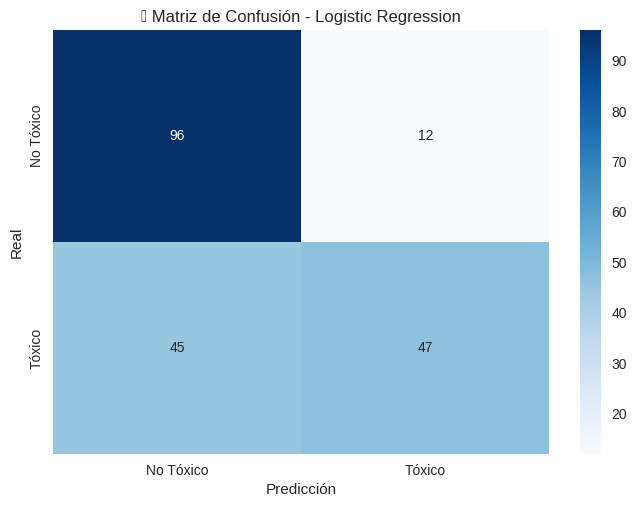

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

# Escalar numéricas sin centrar (mantener sparse matrix)
scaler = StandardScaler(with_mean=False)
X_num_train_scaled = scaler.fit_transform(X_num_train.astype(float))
X_num_test_scaled = scaler.transform(X_num_test.astype(float))

# Combinar texto vectorizado y numéricas escaladas
X_train = hstack([X_text_train_tfidf, X_num_train_scaled])
X_test = hstack([X_text_test_tfidf, X_num_test_scaled])

print(f"Dimensiones X_train: {X_train.shape}")
print(f"Dimensiones X_test: {X_test.shape}")
print(f"Dimensiones y_train: {y_train.shape}")
print(f"Dimensiones y_test: {y_test.shape}")

# Entrenar modelo con validación cruzada
clf = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print(f"\n🎯 F1-score medio (validación cruzada): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Entrenar en el train completo y evaluar en test
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Reporte
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tóxico', 'Tóxico'],
            yticklabels=['No Tóxico', 'Tóxico'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('🔍 Matriz de Confusión - Logistic Regression')
plt.show()

🔁 Media F1-score (5-fold CV): 0.626

📋 Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.78      0.73       108
        True       0.69      0.58      0.63        92

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200



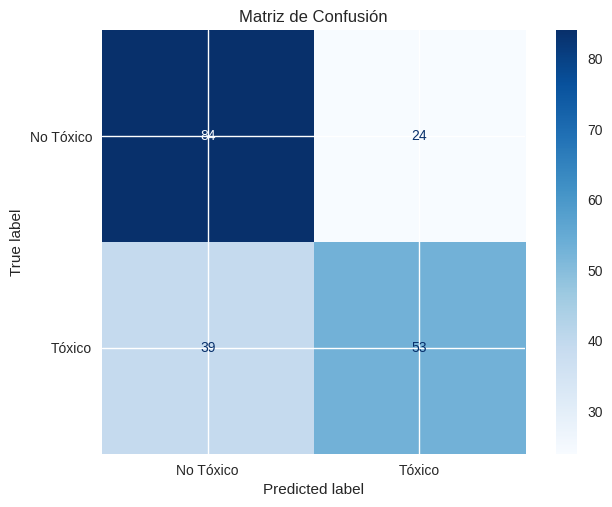

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import hstack, csr_matrix
import matplotlib.pyplot as plt

# 1. Separar variables
X_text = df_model['Text_Clean']
X_numeric = df_model[['Uppercase_Ratio', 'Has_Uppercase_Word', 'Text_Length',
                      'Word_Count', 'Exclamation_Count', 'Question_Count', 'Repeated_Chars']]
y = df_model['IsToxic']

# 2. Train-test split
X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Vectorizar texto
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_test_tfidf = tfidf.transform(X_text_test)

# 4. Estandarizar variables numéricas
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

# 5. Combinar texto y variables numéricas
X_train = hstack([X_text_train_tfidf, csr_matrix(X_num_train_scaled)])
X_test = hstack([X_text_test_tfidf, csr_matrix(X_num_test_scaled)])

# 6. Modelo con pesos balanceados
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 7. Validación cruzada (media f1-score)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(f"🔁 Media F1-score (5-fold CV): {cv_scores.mean():.3f}")

# 8. Predicciones y evaluación
y_pred = model.predict(X_test)
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tóxico', 'Tóxico'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


🔁 Media F1-score (5-fold CV) Random Forest: 0.559

📋 Classification Report Random Forest:
              precision    recall  f1-score   support

       False       0.68      0.91      0.77       108
        True       0.82      0.49      0.61        92

    accuracy                           0.71       200
   macro avg       0.75      0.70      0.69       200
weighted avg       0.74      0.71      0.70       200



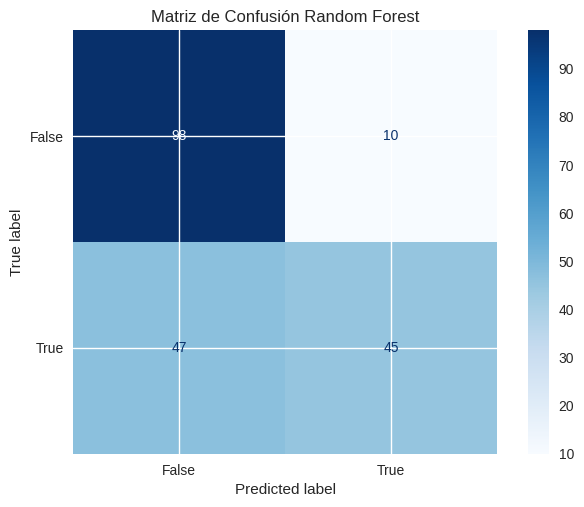

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear modelo Random Forest (podemos ajustar parámetros después)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Combinar features numéricas y de texto (ya lo tienes hecho: X_train, X_test)
# Target
# y_train, y_test

# Validación cruzada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1')

print(f"🔁 Media F1-score (5-fold CV) Random Forest: {cv_scores.mean():.3f}")

# Entrenar modelo completo en train
rf.fit(X_train, y_train)

# Predecir test
y_pred = rf.predict(X_test)

# Reporte clasificación
print("\n📋 Classification Report Random Forest:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Random Forest")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import numpy as np

# --- Vectorización y datos numéricos (igual que antes) ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_test_tfidf = tfidf.transform(X_text_test)

# Estandarizar numéricos
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

# Combinar texto y numéricos (convertir numéricos a sparse)
from scipy.sparse import csr_matrix
X_num_train_sparse = csr_matrix(X_num_train_scaled)
X_num_test_sparse = csr_matrix(X_num_test_scaled)

X_train = hstack([X_text_train_tfidf, X_num_train_sparse])
X_test = hstack([X_text_test_tfidf, X_num_test_sparse])

# --- Aplicar SMOTE SOLO al entrenamiento ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Antes SMOTE: {np.bincount(y_train)}")
print(f"Después SMOTE: {np.bincount(y_train_smote)}")

# --- Definir modelo y parámetros para GridSearch ---
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# --- Entrenar con SMOTE ---
grid_search.fit(X_train_smote, y_train_smote)

print(f"Mejores parámetros: {grid_search.best_params_}")

# --- Evaluar en test set ---
y_pred = grid_search.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Antes SMOTE: [430 370]
Después SMOTE: [430 430]
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Matriz de Confusión:
[[98 10]
 [45 47]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.69      0.91      0.78       108
        True       0.82      0.51      0.63        92

    accuracy                           0.72       200
   macro avg       0.75      0.71      0.71       200
weighted avg       0.75      0.72      0.71       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definir modelo con class_weight para priorizar clase positiva (tóxicos)
rf = RandomForestClassifier(random_state=42, class_weight={0:1, 1:3})

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch priorizando recall (puedes cambiar a 'f1' si quieres)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=1)

# Entrenar con datos SMOTE ya preparados
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

# Predecir con el mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Matriz de confusión y reporte
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Matriz de Confusión:
[[  1 107]
 [  0  92]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      0.01      0.02       108
        True       0.46      1.00      0.63        92

    accuracy                           0.47       200
   macro avg       0.73      0.50      0.33       200
weighted avg       0.75      0.47      0.30       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Modelo con clase balanceada automáticamente
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=10,
                            min_samples_split=5, min_samples_leaf=1)

# Entrenar con los datos de entrenamiento (X_train, y_train)
rf.fit(X_train, y_train)

# Predecir probabilidades para clase positiva (1)
y_probs = rf.predict_proba(X_test)[:, 1]

# Calcular precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# F1 score para cada threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Elegir el umbral con mejor f1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Mejor umbral por F1: {best_threshold:.3f}, F1-score: {f1_scores[best_idx]:.3f}")

# Aplicar umbral para predecir etiquetas
y_pred_threshold = (y_probs >= best_threshold).astype(int)

# Matriz de confusión y reporte con nuevo umbral
print("Matriz de Confusión con umbral ajustado:")
print(confusion_matrix(y_test, y_pred_threshold))

print("\nReporte de Clasificación con umbral ajustado:")
print(classification_report(y_test, y_pred_threshold))


Mejor umbral por F1: 0.457, F1-score: 0.677
Matriz de Confusión con umbral ajustado:
[[28 80]
 [ 4 88]]

Reporte de Clasificación con umbral ajustado:
              precision    recall  f1-score   support

       False       0.88      0.26      0.40       108
        True       0.52      0.96      0.68        92

    accuracy                           0.58       200
   macro avg       0.70      0.61      0.54       200
weighted avg       0.71      0.58      0.53       200



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos (los tienes ya listos: X_train, X_test, y_train, y_test)

# Convertir a DMatrix (opcional pero recomendado)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir el clasificador XGBoost con balanceo usando 'scale_pos_weight'
# scale_pos_weight = num_negativos / num_positivos
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Parámetros para GridSearch
param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Grid search con 3 folds CV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

# Evaluar en test
y_pred = grid_search.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
Matriz de Confusión:
[[85 23]
 [39 53]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.69      0.79      0.73       108
        True       0.70      0.58      0.63        92

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



Tipo de Cross Validation
LOOCV (Leave-One-Out) Each point is a test set once. Almost unbiased. Very costly, high variance. Small datasets or theoretical cases.